# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_studey.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and vidualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/jventura/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
df.sample(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
295903,36.0,5.0,5052017,5,5,2017,1100.0,2017004374,2.017004e+09,1.0,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0,2.0,2.0
283298,34.0,6.0,8012017,8,1,2017,1100.0,2017010025,2.017010e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
279019,34.0,8.0,8272017,8,27,2017,1100.0,2017005740,2.017006e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,2.0
295280,36.0,4.0,4042017,4,4,2017,1100.0,2017003751,2.017004e+09,1.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
282614,34.0,12.0,1032017,1,3,2017,1100.0,2017009340,2.017009e+09,NaN,...,2.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
278402,34.0,9.0,9062017,9,6,2017,1100.0,2017005123,2.017005e+09,1.0,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0
52196,9.0,10.0,10172017,10,17,2017,1100.0,2017002261,2.017002e+09,1.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,9.0
279796,34.0,10.0,11032017,11,3,2017,1100.0,2017006517,2.017007e+09,1.0,...,1.0,1.0,9.0,9.0,9.0,1.0,1.0,NaN,NaN,1.0
53781,9.0,5.0,5252017,5,25,2017,1200.0,2017003849,2.017004e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN
277945,34.0,5.0,6302017,6,30,2017,1100.0,2017004666,2.017005e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0


In [5]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [6]:
df['PHYSHLTH'].mean(), df['PHYSHLTH'].value_counts()

(60.213402807931686,
 88.0    21296
 30.0     2438
 2.0      1993
 1.0      1538
 3.0      1187
 5.0      1092
 10.0      751
 7.0       641
 15.0      640
 4.0       622
 77.0      493
 20.0      402
 14.0      326
 99.0      305
 6.0       187
 25.0      159
 8.0        99
 21.0       70
 12.0       69
 28.0       57
 29.0       35
 27.0       22
 18.0       19
 16.0       16
 17.0       15
 9.0        15
 22.0       12
 13.0       10
 19.0       10
 11.0        8
 24.0        7
 26.0        7
 23.0        4
 Name: PHYSHLTH, dtype: int64)

In [7]:
# the mean is 60 for a category that should only include upto '30'... 

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [8]:
# your code here - 9:CT, 34:NJ, 36:NY
tsdf = df[df['_STATE'].isin([9,34,36])]
tsdf._STATE.sample(5)

276948    34.0
279480    34.0
277114    34.0
279578    34.0
278072    34.0
Name: _STATE, dtype: float64

Now check to see how large our subset df.

In [9]:
# your code here
tsdf.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [10]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [11]:
len(tsdf[tsdf.PHYSHLTH == 88.0])

21296

In [12]:
len(tsdf[tsdf.PHYSHLTH == 77.0])

493

In [13]:
len(tsdf[tsdf.PHYSHLTH == 99.0])

305

In [14]:
# tsdf['PHYSHLTH'] = tsdf['PHYSHLTH'].map(lambda x : int(x))
# tsdf['PHYSHLTH'] = tsdf['PHYSHLTH'].map(lambda x : str(x))

zero_dict = {88.0:0, 77.0: np.nan, 99.0 : np.nan}
tsdf['PHYSHLTH'] = tsdf['PHYSHLTH'].replace(zero_dict)

In [15]:
tsdf.dropna(subset=['PHYSHLTH'], inplace= True)

In [16]:
tsdf.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [17]:
# descriptive statistics
tsdf.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

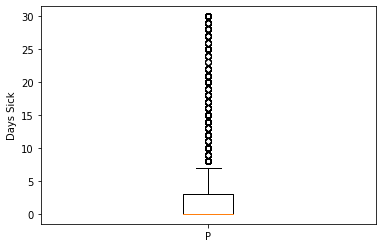

In [18]:
#tsdf['PHYSHLTH'].median()
#tsdf['PHYSHLTH'] = tsdf['PHYSHLTH'].map(lambda x: x.replace('88', '0'))
#tsdf['PHYSHLTH'] = tsdf['PHYSHLTH'].map(lambda x : int(x))

fig, ax = plt.subplots()

ax.boxplot(tsdf.PHYSHLTH)
ax.set_xticklabels('PHYSHLTH')
ax.set_ylabel('Days Sick')
plt.show()

In [19]:
tsdf = tsdf[tsdf['PHYSHLTH']!= 77]
tsdf = tsdf[tsdf['PHYSHLTH']!= 99]

In [20]:
tsdf['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

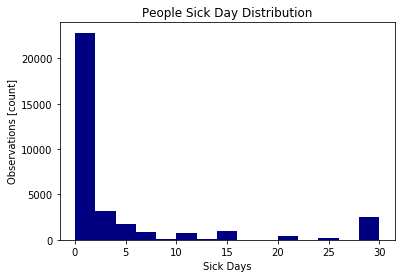

In [21]:
fig, ax =plt.subplots()

ax.hist(tsdf.PHYSHLTH,color = 'navy', bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('Observations [count]')
ax.set_title('People Sick Day Distribution')

plt.show()

In [22]:
# graphic the distribution of data ANS

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [23]:
# code to calculate the average number of sick days by state
#Conn_mean = tsdf[tsdf['_STATE']==9].PHYSHLTH.mean()
#NJ_mean = tsdf[tsdf['_STATE']==34].PHYSHLTH.mean()
#NY_mean = tsdf[tsdf['_STATE']==36].PHYSHLTH.mean()

tsdf.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [24]:
state_sd_mean = tsdf.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['CT','NJ','NY']

Text(0.5, 1.0, 'Comparing Health by State')

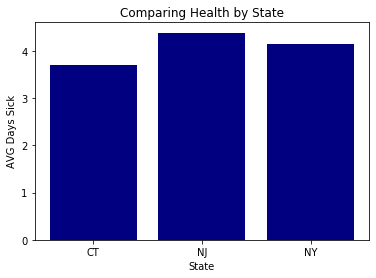

In [25]:
fig, ax = plt.subplots()
ax.bar(states, state_sd_mean, color='navy')

plt.xlabel('State')
plt.ylabel('AVG Days Sick')
plt.title('Comparing Health by State')

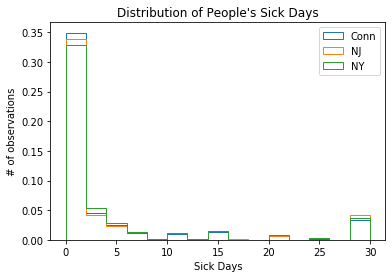

In [26]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(tsdf[tsdf['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(tsdf[tsdf['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(tsdf[tsdf['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [27]:
# code to create new colum for chronically sick
tsdf['chron']=np.where(tsdf['PHYSHLTH']>=14,1,0)


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [28]:
# graphic showing the histogram of data

# tsdf.chron.values.tolist()

# tsdf_chron= tsdf.groupby(['_STATE']).chron.mean()
# tsdf_chron

# create graphic to compare chronically sick by state
# Conn_chron = tsdf[tsdf['_STATE']==9].chron.mean()
# NJ_chron = tsdf[tsdf['_STATE']==34].chron.mean()
# NY_chron = tsdf[tsdf['_STATE']==36].chron.mean()
# Conn_chron
# NJ_chron
# NY_chron
# y= [Conn_chron, NJ_chron, NY_chron]
# x= ['Conn','NJ','NY']
# plt.bar(x, y)
# plt.xlabel('State')
# plt.ylabel('Percent of chronically sick')
# plt.title('Comparing Health by State')

tsdf.groupby('_STATE')['chron'].mean()

_STATE
9.0     0.112552
34.0    0.136760
36.0    0.126305
Name: chron, dtype: float64

In [29]:
# calculate averages per state

chron_means = tsdf.groupby('_STATE')['chron'].mean().values
tsdf.groupby('_STATE')['chron'].mean()

_STATE
9.0     0.112552
34.0    0.136760
36.0    0.126305
Name: chron, dtype: float64

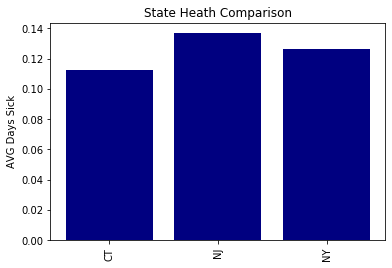

In [30]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chron_means, color = 'navy')

# Set labels and title
ax.set_xticklabels(['CT', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('State Heath Comparison')

plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [31]:
tsdf.shape

(33747, 359)

In [32]:
tsdf.SMOKDAY2.value_counts(), 'sum = ' + str(tsdf.SMOKDAY2.value_counts().sum())

(3.0    9494
 1.0    2611
 2.0    1336
 9.0      21
 7.0       6
 Name: SMOKDAY2, dtype: int64,
 'sum = 13468')

In [33]:
#tsdf.SMOKDAY2.value_counts()/len(tsdf['SMOKDAY2'])

In [34]:
len(tsdf.SMOKDAY2)

33747

In [35]:
# code to graph those proportion of differen smoking groups using matplotlib


In [36]:
# your code here
tsdf['smoking'] = np.where(tsdf['SMOKE100']==2,3, tsdf['SMOKDAY2'])

In [37]:
# check total values after update, which should equal 33743- non smokers (323259)
tsdf['smoking'].value_counts().sum()

32153

In [38]:
tsdf['smoking'] = np.where(tsdf['SMOKE100']==7, 7, tsdf['smoking'])
tsdf['smoking'] = np.where(tsdf['SMOKE100']==9, 9, tsdf['smoking'])

In [39]:
tsdf.smoking.value_counts().sum()

32359

In [40]:
tsdf.smoking.count()

32359

In [41]:
smoking_avgs = tsdf['smoking'].value_counts()/tsdf['smoking'].count()
smoking_avgs


3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

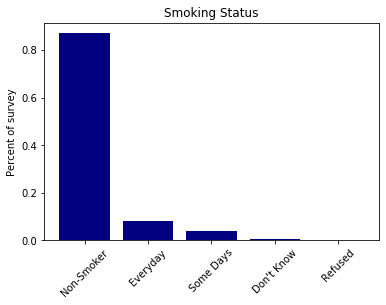

In [42]:
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avgs, color='navy')

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=45)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [43]:
tsdf.groupby(['_STATE', 'smoking'])['smoking'].count()

_STATE  smoking
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
        9.0          26
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
        9.0          14
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
        9.0          26
Name: smoking, dtype: int64

In [44]:
zero_dict = {3:'non', 
            2: 'some',
            1: 'every',
            7: 'unknown',
            9: 'unknown'}

tsdf['smoking_cat'] = tsdf['smoking'].replace(zero_dict)

In [45]:
#state_smoking = df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})
state_percentage = pd.DataFrame(tsdf.groupby(by = '_STATE')['smoking_cat'].value_counts(normalize = True) * 100)
state_percentage


smoking_cat
_STATE smoking_cat             
9.0    non            88.602537
       every           7.052243
       some            3.436220
       unknown         0.909000
34.0   non            86.722704
       every           8.143529
       some            4.338395
       unknown         0.795372
36.0   non            86.086494
       every           8.897554
       some            4.537398
       unknown         0.478554

In [46]:
state_percentage.unstack()

smoking_cat                               
smoking_cat       every        non      some   unknown
_STATE                                                
9.0            7.052243  88.602537  3.436220  0.909000
34.0           8.143529  86.722704  4.338395  0.795372
36.0           8.897554  86.086494  4.537398  0.478554

In [47]:
#graph showing the breakdown of smokers per state

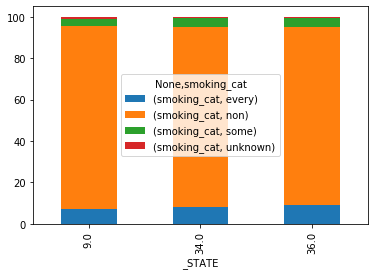

In [48]:
state_percentage.unstack().plot(kind='bar', stacked=True)

In [49]:
category_avg = tsdf.groupby('smoking_cat')['PHYSHLTH'].mean()
category_std = tsdf.groupby('smoking_cat')['PHYSHLTH'].std()
category_avg

smoking_cat
every      6.653007
non        3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

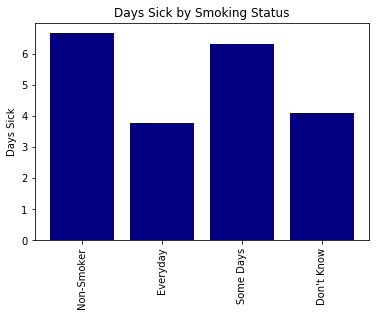

In [50]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], category_avg, color='navy')

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

In [51]:
# code to graph these averages sick days for each category of smoking status

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [52]:
# code here to clean up the ALCDAY5 responses
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

tsdf['alcohol'] = tsdf['ALCDAY5'].replace(alc_dict)

In [53]:
#tsdf.ALCDAY5.value_counts()

In [54]:
#descriptive statistics of cleaned data
tsdf.alcohol.describe()

count    31532.000000
mean       107.654129
std         95.274739
min          0.000000
25%          0.000000
50%        103.000000
75%        203.000000
max        230.000000
Name: alcohol, dtype: float64

In [55]:
# graphic showing the histogram of data


In [56]:
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min((x-100)*4.34524, 30)
    else:
        return x

In [57]:
tsdf.alcohol = tsdf.alcohol.apply(calc_monthly)

In [58]:
tsdf.alcohol.describe()

count    31532.000000
mean         5.495244
std          8.423029
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

/Users/jventura/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jventura/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


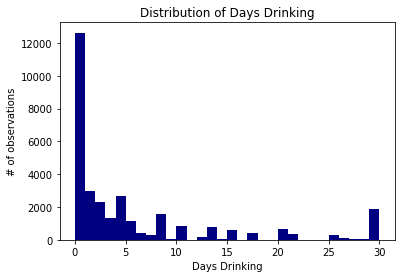

In [59]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(tsdf['alcohol'], bins=30, color='navy')

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [60]:
# code to calculate averages per state
alcohol_state = tsdf.groupby('_STATE')['alcohol'].mean().values
tsdf.groupby('_STATE')['alcohol'].mean()

_STATE
9.0     6.199627
34.0    5.057856
36.0    5.301178
Name: alcohol, dtype: float64

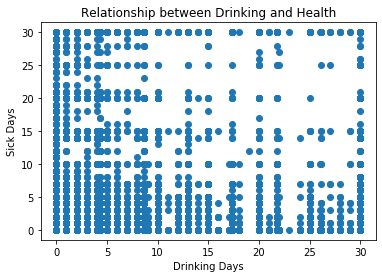

In [61]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(tsdf["alcohol"], tsdf["PHYSHLTH"])

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [62]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

In [63]:
tsdf[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
alcohol    -0.091154
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [64]:
import scipy.stats as stats

mu = tsdf.PHYSHLTH.mean()

stdev = np.std(df.PHYSHLTH)/np.sqrt(len(df.PHYSHLTH))
stats.norm.interval(alpha = 0.95,
                 loc = mu,
                 scale = stdev)



(3.6898528806773836, 4.480828957708251)

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [65]:
p = tsdf.chron.mean()

mu2=sum(tsdf.chron)/len(tsdf.chron) 

stdev2 = np.std(tsdf.chron)/np.sqrt(tsdf.chron.count())

stats.norm.interval(alpha=0.95, loc=mu2, scale=stdev2)

(0.12207529022535482, 0.1291470406485006)

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?

/* one tailed t-test

- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


In [67]:
tsdf.PHYSHLTH.mean()


4.085340919192817

In [ ]:
#1.) H_0 : men_p - wmen_p = 0 ; H_A = men_p - wmen_p !=0

In [130]:
#2.)  H_0 : men_p - wmen_p = 0 ; H_A = men_p - wmen_p !=0

tsdf.SEX.map(lambda x: float(x))
tsdf['male_sick'] = tsdf.SEX.map(lambda x: 1 if x==1.0 else 0 )
tsdf['fmale_sick'] = tsdf.SEX.map(lambda x: 1 if x==2.0 else 0) 



In [131]:
tsdf.male_sick.mean(), tsdf.fmale_sick.mean()

(0.43909088215248765, 0.5603757371025573)

In [132]:
tsdf.SEX.value_counts()

2.0    18911
1.0    14818
9.0       18
Name: SEX, dtype: int64

In [156]:
pnull = (sum(tsdf.male_sick) + sum(tsdf.fmale_sick)) / (len(tsdf.male_sick) + len(tsdf.fmale_sick))

p_man =  sum(tsdf.male_sick)/tsdf.male_sick.count()
p_woman = sum(tsdf.fmale_sick)/tsdf.fmale_sick.count()

z = (p_man-p_woman) / np.sqrt( (pnull*(1-pnull))/(2/tsdf.male_sick.count())) 
z
tsdf.SEX.count()


33747

In [157]:
tsdf.SEX.map(lambda x: int(x))
tsdf['Male_sickcount'] = tsdf.SEX.map(lambda x: 1 if x==1 else 0)
tsdf['Female_sickcount'] = tsdf.SEX.map(lambda x: 1 if x==2 else 0)


pnull = (sum(tsdf['Male_sickcount']) + sum(tsdf['Female_sickcount']))/ ((tsdf['Male_sickcount'].count())+(tsdf['Female_sickcount'].count()))
pman= sum(tsdf['Male_sickcount'])/tsdf['Male_sickcount'].count()
pwomen= sum(tsdf['Female_sickcount'])/tsdf['Female_sickcount'].count()
(pman-pwomen)/np.sqrt(2*pnull*(1-pnull)/(tsdf['Male_sickcount'].count()))

-31.50933361844972

In [150]:
pnull

0.49973330962752244

### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.